# Pandas Lightning Talk Demo
We will go over how to use pandas to import and process data related to the novel COVID-19 virus

The first step is to import Pandas
Also include matplotlib inline to show graphs in Pandas

Copyright Nick Piacente, Ziam Ghaznavi, David Cayll

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt


## Data Source
Johns Hopkins University is compiling COVID-19 data from multiple sources daily.  They publish the raw data on their Github page.  We can find the most recent data at the link below:

https://github.com/CSSEGISandData/COVID-19

We can import the data related to global deaths, confirmed cases, and recovered cases using these links to their data

In [2]:
deaths_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
confirmed_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

## Bring in data
We can bring in data using the read_csv method.  The data is now contained in a Pandas DataFrame 


In [3]:
deaths = pd.read_csv(deaths_url)
confirmed = pd.read_csv(confirmed_url)

In [4]:
type(deaths)

# also works
#type(confirmed)

pandas.core.frame.DataFrame

### Let's find the most recent date of data

In [5]:
mostRecentDate = deaths.columns[-1] # gets the columns of the matrix

In [6]:
mostRecentDate

'3/24/20'

### The (minimally processed) DataFrame can be seen below
Sorted by confirmed count max at the latest date

In [7]:
# formatting for Jupyter Notebook
pd.options.display.max_columns = 13
pd.options.display.max_rows = 20

# try 'confirmed', deaths'
data = deaths

# show the data frame
data.sort_values(by=mostRecentDate, ascending = False)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,...,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
137,NaN,Italy,43.0000,12.000000,0,0,...,3405,4032,4825,5476,6077,6820
62,Hubei,China,30.9756,112.270700,17,17,...,3130,3133,3139,3153,3153,3160
201,NaN,Spain,40.0000,-4.000000,0,0,...,830,1043,1375,1772,2311,2808
133,NaN,Iran,32.0000,53.000000,0,0,...,1284,1433,1556,1685,1812,1934
116,NaN,France,46.2276,2.213700,0,0,...,243,450,562,674,860,1100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Qinghai,China,35.7452,95.995600,0,0,...,0,0,0,0,0,0
152,NaN,Madagascar,-18.7669,46.869100,0,0,...,0,0,0,0,0,0
75,Shanxi,China,37.5777,112.292200,0,0,...,0,0,0,0,0,0
78,Tibet,China,31.6927,88.092400,0,0,...,0,0,0,0,0,0


## Adding Filters can make the data more meaningful
Let's process the DataFrame to show confirmed cases by date for the top 20 countries

We won't use the Lat/Long data, and need to group the data by country

In [8]:
countryFrames = data.drop(['Lat','Long'], axis=1)

In [9]:
# save this index variable to save the order.
index = countryFrames.columns.drop(['Province/State']) 

### The pivot_table method will eliminate duplicate entries from Countries with more than one city

In [10]:
# unintended consequence of incorrect sorting and date order
countryFrames.pivot_table(index = 'Country/Region', aggfunc = sum)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20
Country/Region,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,...,0,0,0,0,0,0
Albania,0,0,0,0,0,0,...,0,0,0,0,0,0
Algeria,0,0,0,0,0,0,...,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,...,0,0,0,0,0,0
Angola,0,0,0,0,0,0,...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,0,0,0,0,0,0,...,0,0,0,0,0,0
Venezuela,0,0,0,0,0,0,...,0,0,0,0,0,0
Vietnam,0,0,0,0,0,0,...,0,0,0,0,0,0


In [11]:
# formatting using a variety of methods to process and sort data
finalFrame = countryFrames.transpose().reindex(index).transpose().set_index('Country/Region').sort_values(by=mostRecentDate, ascending=False).transpose()

In [12]:
finalFrame

Country/Region,Italy,China,Spain,Iran,France,US,...,Maldives,China,Madagascar,China,China,Libya
1/22/20,0,17,0,0,0,0,...,0,0,0,0,0,0
1/23/20,0,17,0,0,0,0,...,0,0,0,0,0,0
1/24/20,0,24,0,0,0,0,...,0,0,0,0,0,0
1/25/20,0,40,0,0,0,0,...,0,0,0,0,0,0
1/26/20,0,52,0,0,0,0,...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3/20/20,4032,3133,1043,1433,450,244,...,0,0,0,0,0,0
3/21/20,4825,3139,1375,1556,562,307,...,0,0,0,0,0,0
3/22/20,5476,3153,1772,1685,674,417,...,0,0,0,0,0,0
3/23/20,6077,3153,2311,1812,860,557,...,0,0,0,0,0,0


## We can plot the data for the top 20 countries

In [13]:
#try other amounts
topAmount = 20

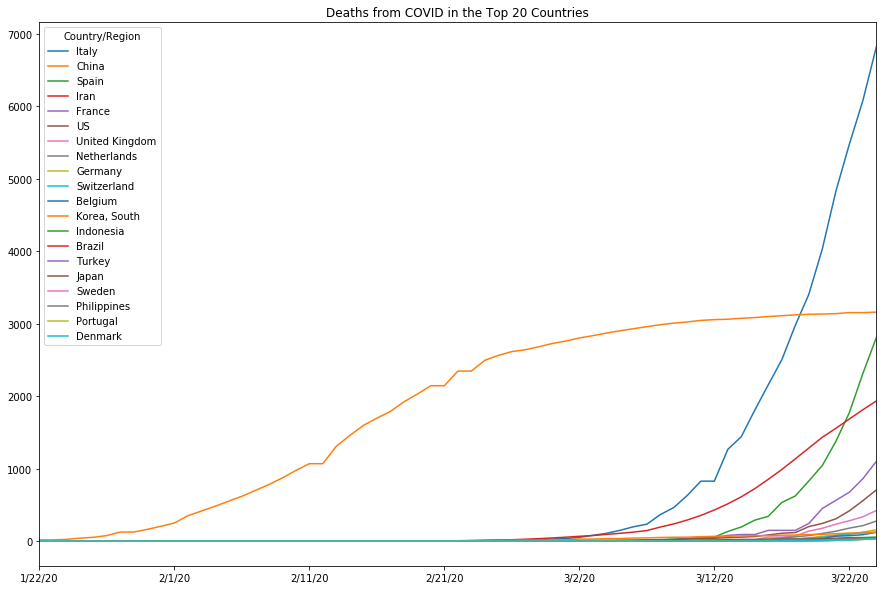

In [14]:
finalFrame.iloc[:, :topAmount].plot(figsize=(15, 10), title = "Deaths from COVID in the Top {} Countries".format(topAmount))

# Lets take a look at the most recent US Data 
Existing cases by day are tracked in a different CSV, labeled : 'MM-DD-YYYY.csv' in a different directory

In [15]:
dateForURL = '0' + mostRecentDate.replace('/','-')+ '20.csv' # will only work for a while
mostRecent_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/' + dateForURL
mostRecentFrame = pd.read_csv(mostRecent_url)

In [16]:
mostRecentFrame

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-03-24 23:37:31,34.223334,-82.461707,1,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-03-24 23:37:31,30.295065,-92.414197,2,0,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-03-24 23:37:31,37.767072,-75.632346,1,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-03-24 23:37:31,43.452658,-116.241552,19,0,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-03-24 23:37:31,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"
...,...,...,...,...,...,...,...,...,...,...,...,...
3412,NaN,NaN,NaN,Uzbekistan,2020-03-24 23:37:15,41.377491,64.585262,50,0,0,50,Uzbekistan
3413,NaN,NaN,NaN,Venezuela,2020-03-24 23:37:15,6.423800,-66.589700,84,0,15,69,Venezuela
3414,NaN,NaN,NaN,Vietnam,2020-03-24 23:37:15,14.058324,108.277199,134,0,17,117,Vietnam
3415,NaN,NaN,NaN,Zambia,2020-03-24 23:37:15,-13.133897,27.849332,3,0,0,3,Zambia


# More Filtering

In [20]:
# filters the dataframe to the criteria below. Try 'China'or 'Canada'
state = 'Texas' # try others
data = 'Confirmed' # try 'Deaths', 'Recovered', and 'Active'
selectedCountry = mostRecentFrame['Province_State'] == (state)
hasData = mostRecentFrame[data] > 0

mostRecentFrame[selectedCountry & hasData].sort_values(by=data, ascending = False)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
712,48113.0,Dallas,Texas,US,2020-03-24 23:37:31,32.766706,-96.777961,169,5,0,0,"Dallas, Texas, US"
1212,48201.0,Harris,Texas,US,2020-03-24 23:37:31,29.858649,-95.393395,134,1,0,0,"Harris, Texas, US"
2824,48453.0,Travis,Texas,US,2020-03-24 23:37:31,30.334320,-97.785356,86,0,0,0,"Travis, Texas, US"
2766,48439.0,Tarrant,Texas,US,2020-03-24 23:37:31,32.771438,-97.291016,71,1,0,0,"Tarrant, Texas, US"
200,48029.0,Bexar,Texas,US,2020-03-24 23:37:31,29.449287,-98.520197,69,1,0,0,"Bexar, Texas, US"
...,...,...,...,...,...,...,...,...,...,...,...,...
1886,48325.0,Medina,Texas,US,2020-03-24 23:37:31,29.355730,-99.110303,1,0,0,0,"Medina, Texas, US"
841,48133.0,Eastland,Texas,US,2020-03-24 23:37:31,32.327440,-98.832436,1,0,0,0,"Eastland, Texas, US"
1132,48183.0,Gregg,Texas,US,2020-03-24 23:37:31,32.479405,-94.815919,1,0,0,0,"Gregg, Texas, US"
747,48117.0,Deaf Smith,Texas,US,2020-03-24 23:37:31,34.965230,-102.605427,1,0,0,0,"Deaf Smith, Texas, US"


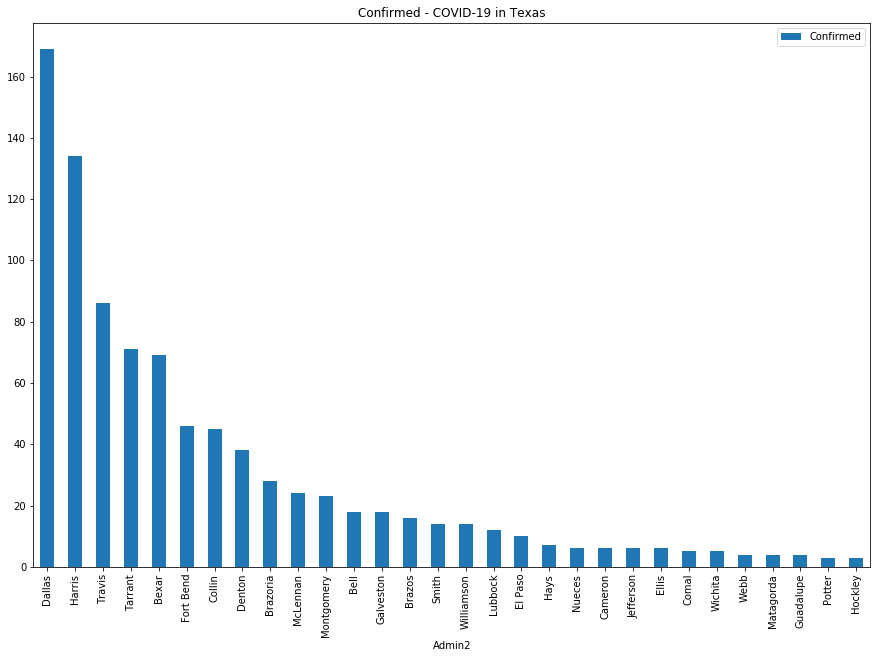

In [18]:
_[:30].plot(kind='bar', x='Admin2', y = data, figsize=(15, 10), title = '{} - COVID-19 in {}'.format(data,state))